<a href="https://colab.research.google.com/github/gopinathrajamanickam/google_colab_as_data_science_ide/blob/main/Google_Colab_The_perfect_IDE_for_Data_Science_Ops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab - The perfect IDE for Data Science Ops
## Working on Data Science and Machine Learning Projects are often a daunting task for the budding Data Scientists.

## Most of the Data Science courses use Jupyter notebooks . Thanks for in line execution to selectively execute and display results as data, tables or eye  catching vizualizations.

## Markdowns make it more attractive as it combines the visual  appeal of HTML pages with the code highlighing and seamless charts.

### And the best part is any code changes are instantly saved and we can switch from different machines , instant collaboration with other developers.







### Things that kept me to go back to the command lines and traditional IDEs 

*   Accessing the source code and data files without using git hub
*   Deploy and test the model as a web app as regular flask deployment will run the model in localhost only





# Came across the way to overpower this



1.   Use Google Drive as the storage for the code and data files  
2.   Use flask-ngrok for deploying model and generate a public url instead of local host
3.   Connect to Github  rrespository and store finished noteook in drive

Let us walk though an example



# Mount the Google Drive to the Colab notebook


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Above code will request you to login to Google Drive and an authorrization code. Once Authorrized your entire Google drive will be accessible on the File Navigator on the left pane 

Any File access will be done via magic commands like %cd , %ls 



In [3]:
%cd  drive/MyDrive/Data\ Science/github

/content/drive/MyDrive/Data Science/github


## Include the kaggle api token

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Data Science/github"

## Download the kaggle dataset

In [5]:
!kaggle datasets download -d pankeshpatel/hiring

  0% 0.00/289 [00:00<?, ?B/s]
100% 289/289 [00:00<00:00, 41.7kB/s]


## Unzip the data 

In [6]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  hiring.zip
  inflating: hiring.csv              


Create the Model

In [7]:
%pwd

'/content/drive/MyDrive/Data Science/github'

In [8]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

dataset = pd.read_csv('hiring.csv')

In [9]:
dataset.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [10]:
dataset.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [16]:
print(dataset.columns) 

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')


In [20]:
# Let us rename the columns to make the code  more readable and avoid errors 
# due to  special charectres in  colum names
dataset.rename(columns = {'test_score(out of 10)':'test_score'
                 ,'interview_score(out of 10)':'interview_score'
                 ,'salary($)':'salary'}, inplace = True) 
print(dataset.columns) 

Index(['experience', 'test_score', 'interview_score', 'salary'], dtype='object')


## The dataset contains columns experience , test_score, interview_score and salary 

## Salary can be considered as the dependent variable Y and  combination of other 3 columns form the independent variables



In [21]:
# Data Cleaning -  Need to check for the  null values and replace it with appropriate values.

dataset['experience'].fillna(0, inplace=True)

dataset['test_score'].fillna(dataset['test_score'].mean(), inplace=True)

X = dataset.iloc[:, :3]

# It will make sense  to convert all the columns as Numeric for  model fitting.
# Converting words to integer values
def convert_to_int(word):
    word_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8,
                'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0: 0}
    return word_dict[word]

X['experience'] = X['experience'].apply(lambda x : convert_to_int(x))

y = dataset.iloc[:, -1]


In [22]:
#Splitting Training and Test Set
#Since we have a very small dataset, we will train our model with all availabe data.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Fitting model with trainig data
regressor.fit(X, y)

# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[2, 9, 6]]))

[53290.89255945]


Model creation and prediction  testing are successful.

Let us deploy this model using Flask Framework.

Since we cannot run the flask as localhost we need to use a flask container  flask-ngrok


In [23]:
!pip install flask-ngrok

Deploy the model pkl using FLask

In [25]:
%pwd

'/content/drive/MyDrive/Data Science/github'

Create requirements.txt

In [30]:
%%writefile requirements.txt
Flask==1.1.1
gunicorn==19.9.0
itsdangerous==1.1.0
Jinja2==2.10.1
MarkupSafe==1.1.1
Werkzeug==0.15.5
numpy>=1.9.2
scipy>=0.15.1
scikit-learn>=0.18
matplotlib>=1.4.3
pandas>=0.19

Writing requirements.txt


Create a folder (templates) to hold the web page html 

In [28]:
%mkdir templates

Add index.html as the home page for the web app

In [31]:
%%writefile templates/index.html
<!DOCTYPE html>
<html >
<!--From https://codepen.io/frytyler/pen/EGdtg-->
<head>
  <meta charset="UTF-8">
  <title>ML API</title>
  <link href='https://fonts.googleapis.com/css?family=Pacifico' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Arimo' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Hind:300' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
  
</head>

<body>
 <div class="login">
	<h1>Predict Salary Analysis</h1>

     <!-- Main Input For Receiving Query to our ML -->
    <form action="{{ url_for('predict')}}"method="post">
    	<input type="text" name="experience" placeholder="Experience" required="required" />
        <input type="text" name="test_score" placeholder="Test Score" required="required" />
		<input type="text" name="interview_score" placeholder="Interview Score" required="required" />

        <button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
    </form>

   <br>
   <br>
   {{ prediction_text }}

 </div>


</body>
</html>


Writing templates/index.html


Trigger the Flask server with the model deployed

In [32]:
import numpy as np
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
import pickle

app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))
run_with_ngrok(app)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    output = round(prediction[0], 2)

    return render_template('index.html', prediction_text='Employee Salary should be $ {}'.format(output))


if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://1d345d23f4ad.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [24/Nov/2020 14:14:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Nov/2020 14:14:23] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [24/Nov/2020 14:14:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Nov/2020 14:14:42] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [24/Nov/2020 14:14:42] "GET /favicon.ico HTTP/1.1" 404 -


Click on the generated  url with domain ngrrok.io 

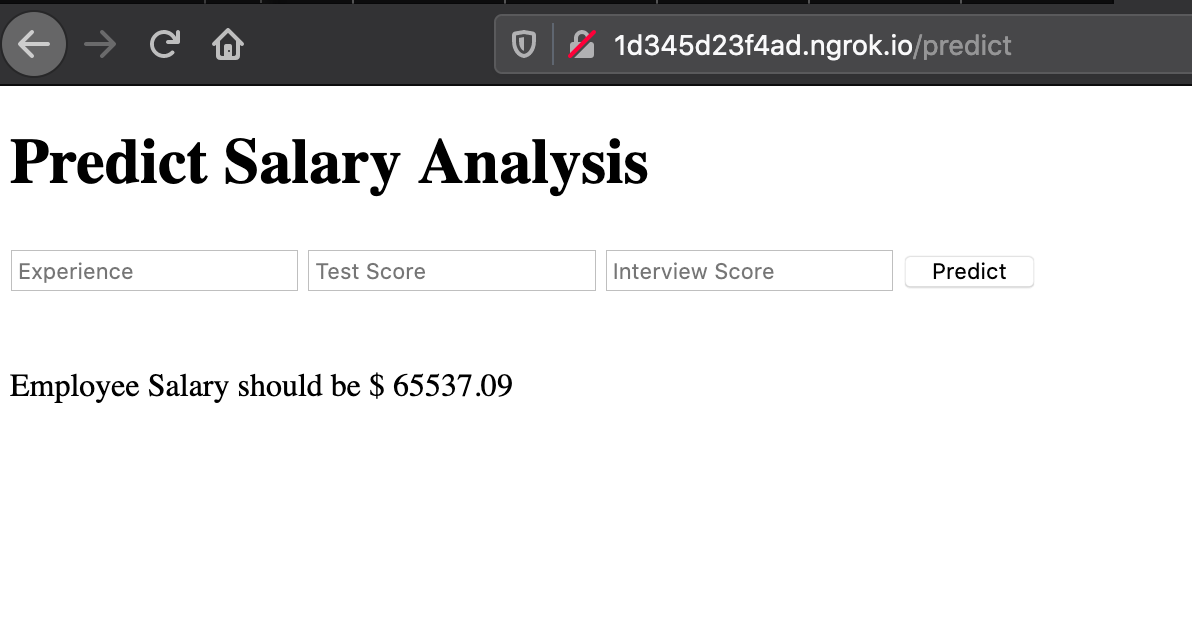



In [ ]:
%git push 

Hurray We have successfully completed the full cycle of this Data Science From Data load to Deployment -- All within Google Colab